# 음성에서 silent인 부분을 관찰하는 프로그램 - rms에서 관찰 되니까 안쓰는게 좋을 듯?
https://github.com/jiaaro/pydub/blob/master/pydub/silence.py   

In [15]:
import pandas as pd
from IPython.display import Audio, display
from pydub import AudioSegment
from pydub.silence import detect_silence
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [39]:
seed = 42
# seed = 123
# seed = 9903
train_file = "../given/train_ver3.csv"
test_file = "../test.csv"

In [40]:
train_df = pd.read_csv(train_file)
train_df = train_df[train_df['path'].str.contains('train')]
train_df.head(3)

,id,path,label,len
0,RUNQPNJF,./train/RUNQPNJF.ogg,real,2393.0
1,JFAWUOGJ,./train/JFAWUOGJ.ogg,fake,1264.0
2,RDKEKEVX,./train/RDKEKEVX.ogg,real,6144.0


In [42]:
train_sample_real_df = train_df[train_df['label'] == "real"].sample(n=5, random_state=seed)
train_sample_fake_df = train_df[train_df['label'] == "fake"].sample(n=5, random_state=seed)

## train real  
방음 환경에서의 진짜 사람 목소리와 가짜 생성 목소리   
각 샘플 당 한명의 목소리

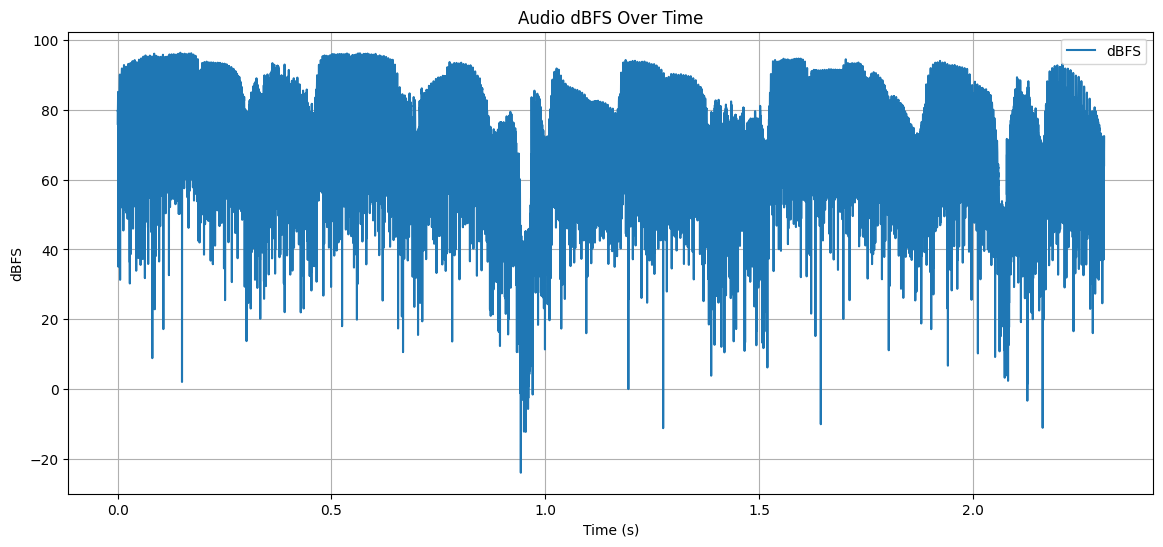

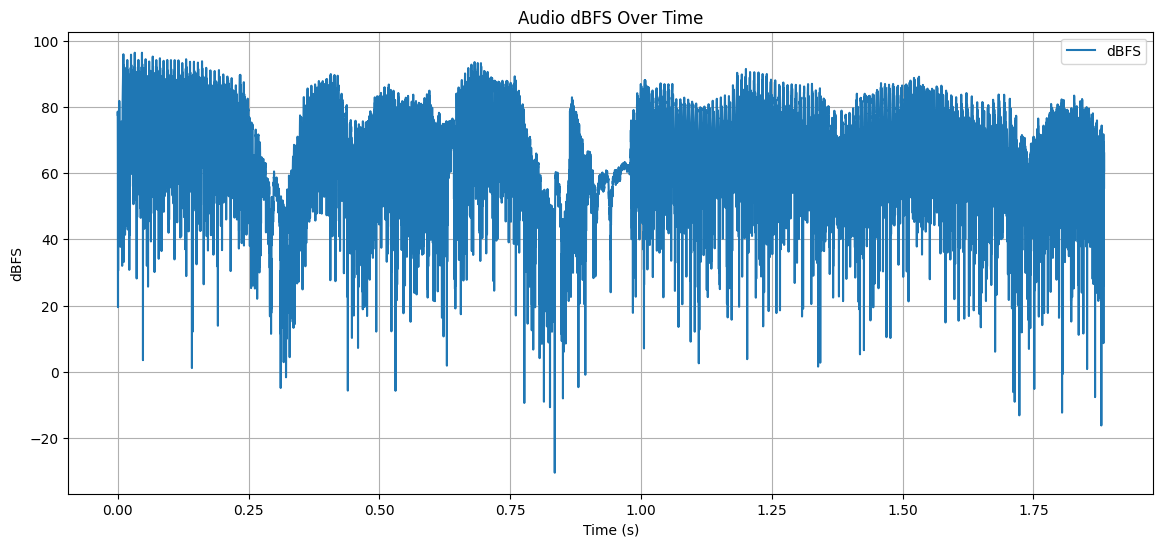

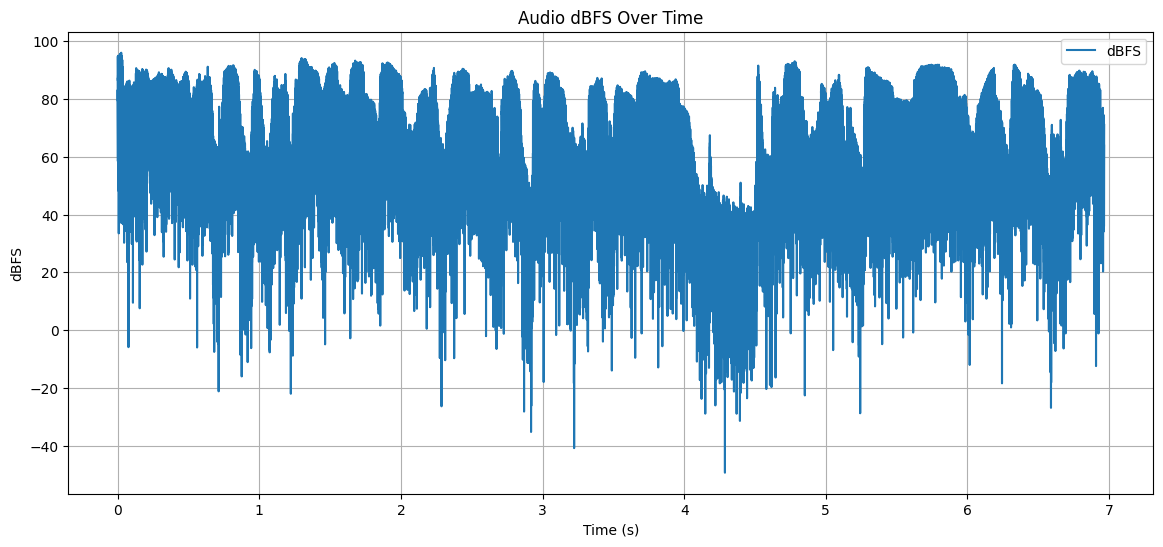

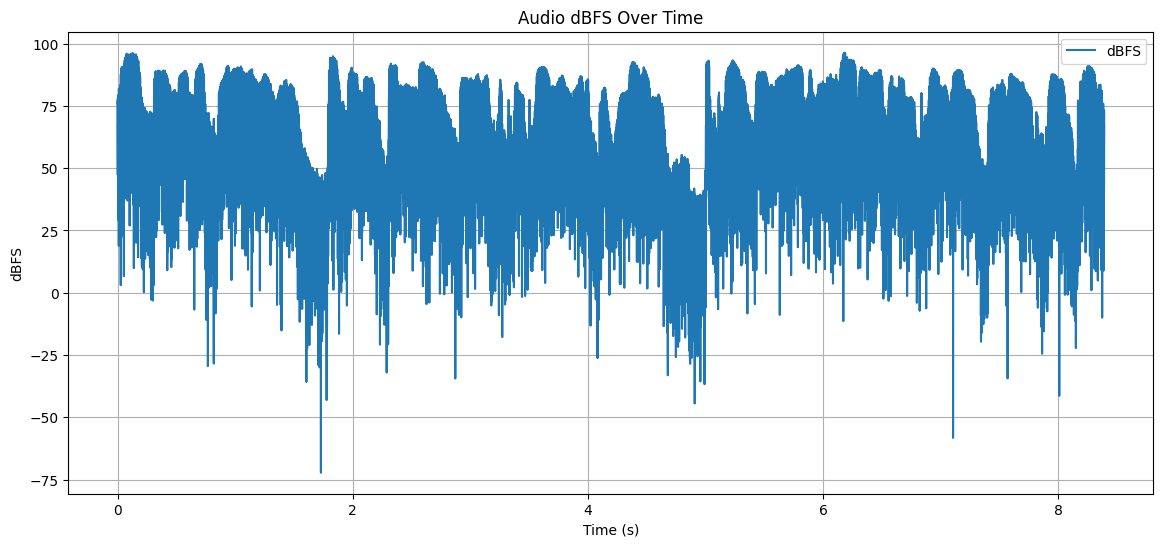

C:\Users\jinik\AppData\Local\Temp\ipykernel_32956\3921658039.py:16: RuntimeWarning: invalid value encountered in log10
  return 20 * np.log10(np.abs(sample) / 32768)


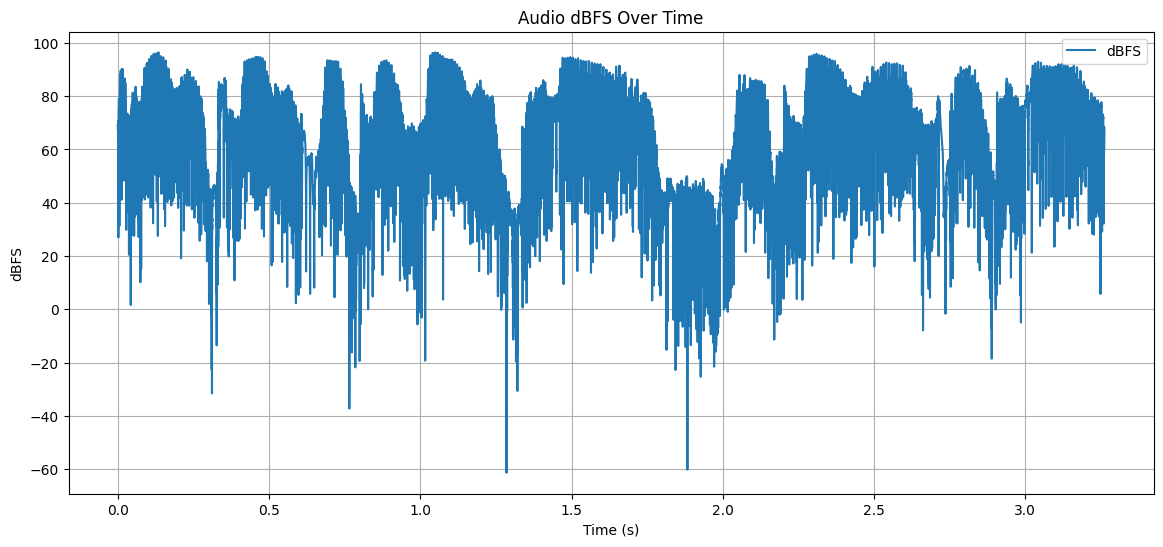

In [43]:
for index, row in train_sample_real_df.iterrows():
    audio_file = "../given"+row['path'][1:]
    audio = AudioSegment.from_file(audio_file)
    
    display(audio)
    # 오디오 데이터를 numpy 배열로 변환
    samples = np.array(audio.get_array_of_samples())

    # 오디오 채널 수 확인 (mono or stereo)
    if audio.channels == 2:
        samples = samples.reshape((-1, 2))
        samples = samples.mean(axis=1)  # 스테레오를 모노로 변환

    # 각 프레임의 dBFS 계산
    def calculate_dbfs(sample):
        return 20 * np.log10(np.abs(sample) / 32768)

    dbfs_values = np.array([calculate_dbfs(sample) for sample in samples])

    # 시간 축 생성
    times = np.linspace(0, len(audio) / 1000, num=len(dbfs_values))

    # 그래프 그리기
    plt.figure(figsize=(14, 6))
    plt.plot(times, dbfs_values, label="dBFS")
    plt.xlabel("Time (s)")
    plt.ylabel("dBFS")
    plt.title("Audio dBFS Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

## train fake

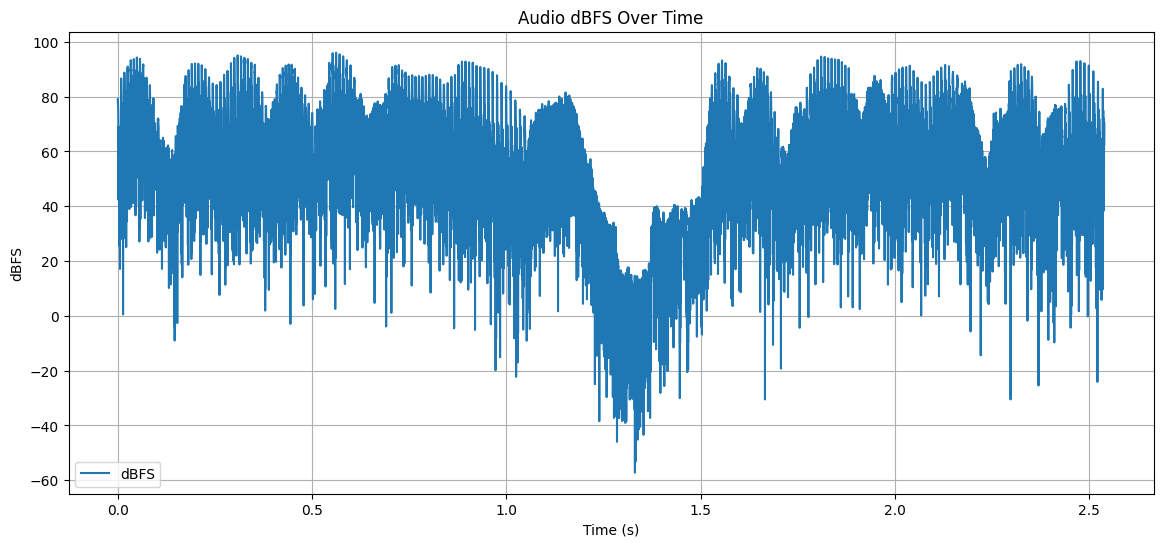

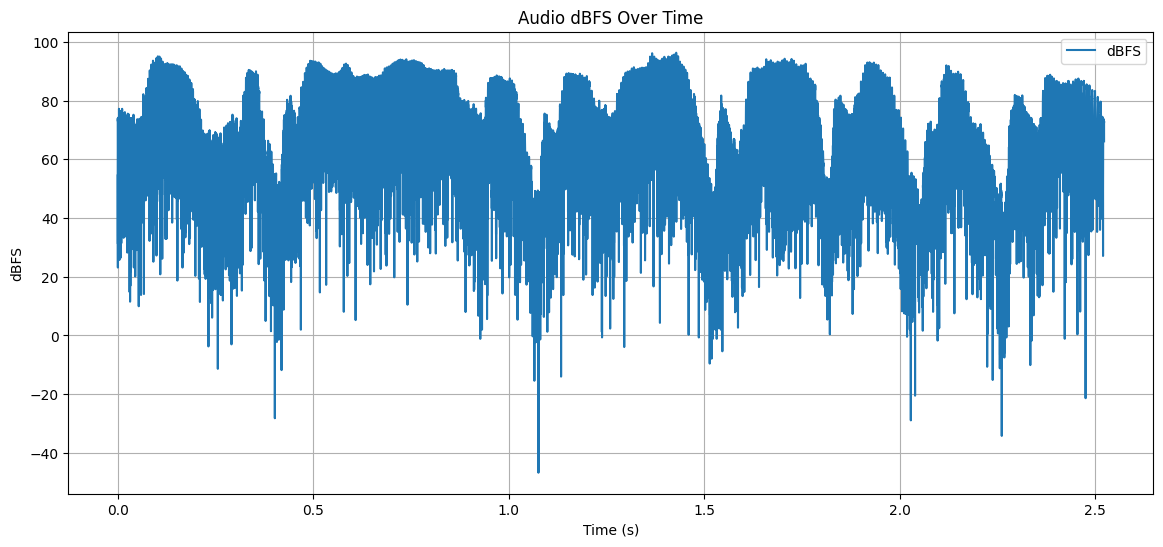

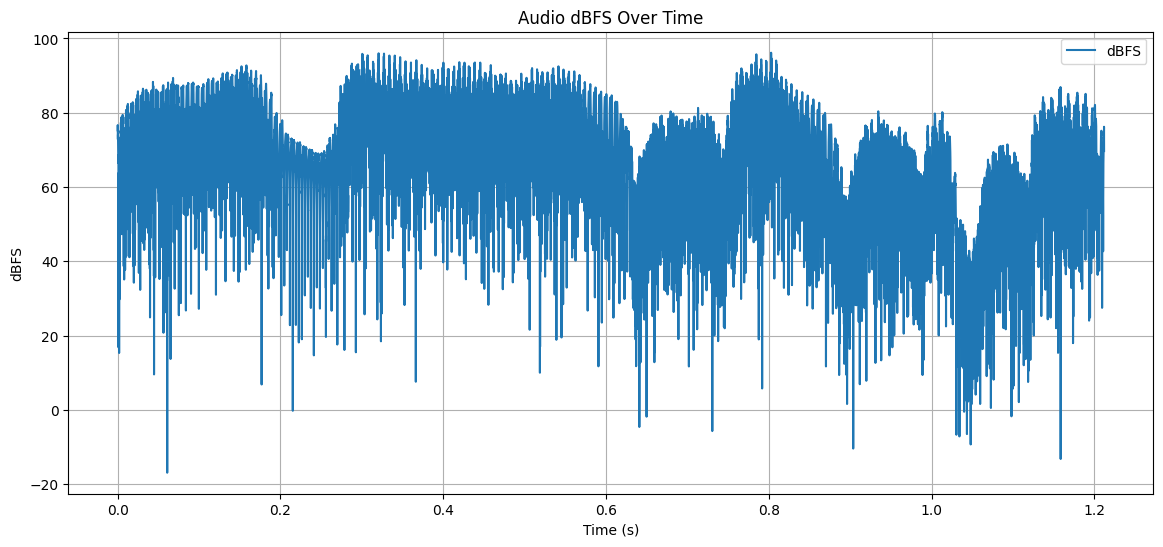

C:\Users\jinik\AppData\Local\Temp\ipykernel_32956\3954353970.py:16: RuntimeWarning: invalid value encountered in log10
  return 20 * np.log10(np.abs(sample) / 32768)


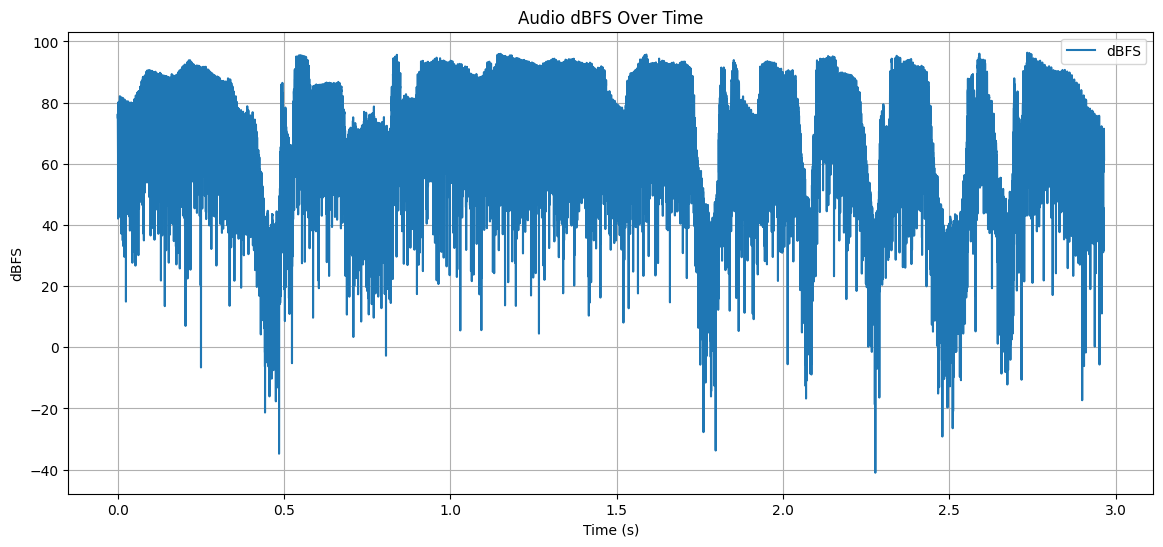

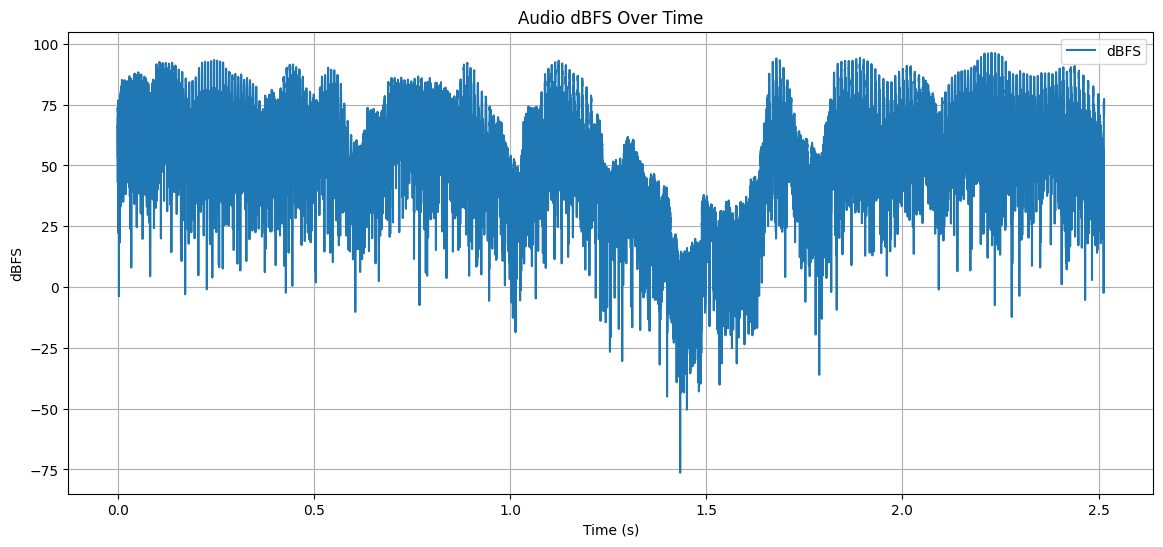

In [44]:
for index, row in train_sample_fake_df.iterrows():
    audio_file = "../given"+row['path'][1:]
    audio = AudioSegment.from_file(audio_file)
    
    display(audio)
    # 오디오 데이터를 numpy 배열로 변환
    samples = np.array(audio.get_array_of_samples())

    # 오디오 채널 수 확인 (mono or stereo)
    if audio.channels == 2:
        samples = samples.reshape((-1, 2))
        samples = samples.mean(axis=1)  # 스테레오를 모노로 변환

    # 각 프레임의 dBFS 계산
    def calculate_dbfs(sample):
        return 20 * np.log10(np.abs(sample) / 32768)

    dbfs_values = np.array([calculate_dbfs(sample) for sample in samples])

    # 시간 축 생성
    times = np.linspace(0, len(audio) / 1000, num=len(dbfs_values))

    # 그래프 그리기
    plt.figure(figsize=(14, 6))
    plt.plot(times, dbfs_values, label="dBFS")
    plt.xlabel("Time (s)")
    plt.ylabel("dBFS")
    plt.title("Audio dBFS Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

## test
5초 분량   
방음 환경/그렇지 않은 환경(배경음악이 있다)   
최대 2개의 목소리(둘 다 real이거나 fake)

In [44]:
# for index, row in test_sample_df.iterrows():
#     audio_file = row['path']
#     print(f"Playing audio file: {audio_file}")
#     display(Audio(audio_file))

()